## Libraries

In [166]:
import numpy as np
import pandas as pd
import random
import scipy.stats as sps
import matplotlib.pyplot as plt

random.seed(88)  

# 1

## ID and Group features

In [167]:
n=800
# creating ID
id=list("ID"+str(i+100) for i in range(1,n+1))
random.shuffle(id)
# creating groups and shuffling
group = np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(group)

## Feature_1

In [168]:
# creating Feature_1
mean1 = 2500
std1 = 300
feature_1 = sps.norm.rvs(mean1, std1, size=n)
feature_1.mean()

2496.3234563701185

## Feature_2 

In [169]:
# creating Feature_2
mean2 = 400
std2 = 15
feature_2 = sps.norm.rvs(mean2, std2, size=n)
feature_2.mean()

399.5215682211895

## Dataframe with ID, Group, Feature_1, Feature_2 attributes

In [170]:
data = pd.DataFrame({"ID":id,"Group":group,"Feature_1":feature_1,"Feature_2":feature_2})
data['Group'].value_counts()

B    267
A    267
C    266
Name: Group, dtype: int64

## Feature_3

In [171]:
# creating Feature_3
data['Feature_3'] = np.nan
data.loc[data['Group'] == 'A', 'Feature_3'] = 3 * data['Feature_1'] - 5 * data['Feature_2']
data.loc[data['Group'] == 'B', 'Feature_3'] = 2 * data['Feature_1']
data.loc[data['Group'] == 'C', 'Feature_3'] = -data['Feature_1'] + data['Feature_2']

# stats for Feature_3 
mean_3 = 0
std_3 = 12
additional_component = sps.norm.rvs(mean_3, std_3, size=n)
data['Feature_3'] += additional_component

In [172]:
data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID387,B,2440.938631,424.441323,4864.831856
1,ID537,B,1705.498511,400.820547,3414.234631
2,ID789,C,2773.768079,391.407483,-2406.293454
3,ID535,A,2565.610303,396.347890,5734.947794
4,ID486,B,3133.587707,424.002603,6253.732835


# 2

## a

In [173]:
# samples greater than 3000 (expected)
from scipy.stats import norm

mean4 = 2500
std4 = 300

# Z-score for 3000
z = (3000 - mean4) / std4

ab3k = 1 - norm.cdf(z)

# Number of samples greater than 3000
samp_ab3k = round( n * ab3k)

print("Number of samples greater than 3000:", samp_ab3k)


Number of samples greater than 3000: 38


## b

In [174]:
# samples with Feature_1 greater than 3000 (actual)
sum(data['Feature_1']>3000)

30

## c

In [175]:
# mean and standard deviation of Feature_3
grpdata = data.groupby('Group')['Feature_3'].agg(['mean', 'std'])
print(grpdata)

              mean         std
Group                         
A      5567.402117  919.563194
B      4936.630598  606.816321
C     -2101.416325  290.820139


# 3

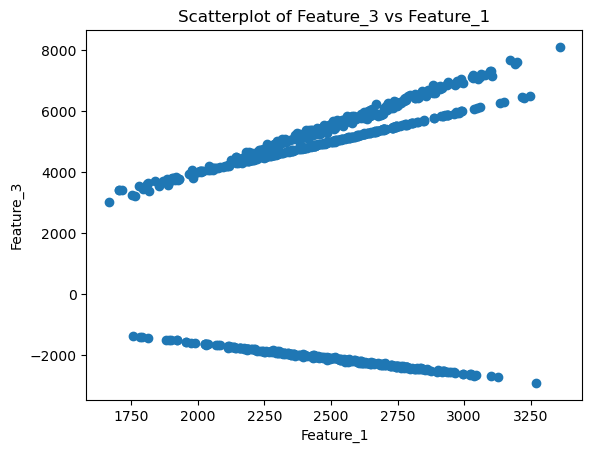

In [176]:
# scatterplot of Feature_3 vs Feature_1
plt.scatter(data['Feature_1'], data['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

# 4

In [177]:
# making .csv file with dataframe
data.to_csv('fake_data.csv', index=False)